In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
relevant_prices = [[(20, 2), (10, 1)], [(30, 5), (5, 2)]]

days_prices = []

for day in relevant_prices:
    days_prices.append(np.average([x[1] for x in day], weights=[x[0] for x in day]))

In [21]:
print(days_prices)

[1.6666666666666667, 4.571428571428571]


In [22]:
last_days = 2

# days_prices = [1/, 3, 2, 5, 6]

x = np.arange(0, last_days)
y = np.array(days_prices)
z = np.polyfit(x, y, 2)

p = np.poly1d(z)
acceptable = p(last_days)

print(x, y, acceptable)

[0 1] [1.66666667 4.57142857] 10.38095238095238


C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


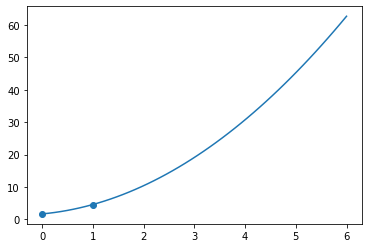

In [23]:
plt.scatter(x, y)
xs = np.linspace(0, 6)
ys = p(xs)
plt.plot(xs, ys)

In [760]:
data = pd.read_csv('csvs/data_new.csv', delimiter=';')
# data

In [761]:
prs = data[data['product']=='PEARLS'].reset_index()
bnn = data[data['product']=='BANANAS'].reset_index()
# bnn

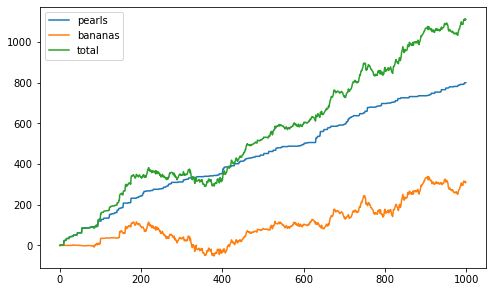

In [762]:
plt.plot(prs['profit_and_loss'], label='pearls')
plt.plot(bnn['profit_and_loss'], label='bananas')
plt.plot(bnn['profit_and_loss'].add(prs['profit_and_loss']), label='total')
plt.legend()

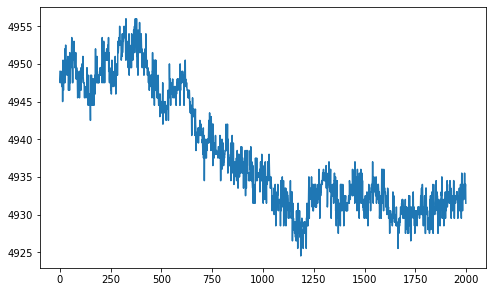

In [198]:
plt.plot(bnn['mid_price'])

In [750]:
def reweigh(xs, ys, a=0):
    out_x = []
    out_y = []
    for (x, y) in zip(xs, ys):
        l = a * int(np.power(len(ys) - x, -20.1)) + 1
        for i in range(l):
            out_x.append(x)
            out_y.append(y)
    return out_x, out_y 

In [757]:
timesteps = bnn.index

days = 25

avgs = []

for time in timesteps:
    if time < days:
        avgs.append(4900)
        continue
    x = np.arange(0, days)
        
    x, ys = reweigh(x, bnn['mid_price'][time-days:time])
    z = np.polyfit(x, ys, 0.1)
    
    p = np.poly1d(z)
    acceptable = p(days)
    avgs.append(acceptable)

In [758]:
print(ys)

[4898.0, 4895.5, 4896.0, 4895.5, 4895.5, 4896.0, 4895.5, 4896.0, 4894.5, 4894.5, 4894.5, 4894.0, 4894.0, 4893.5, 4895.0, 4893.5, 4891.5, 4893.5, 4893.5, 4895.5, 4891.5, 4892.5, 4890.5, 4894.0, 4892.5]


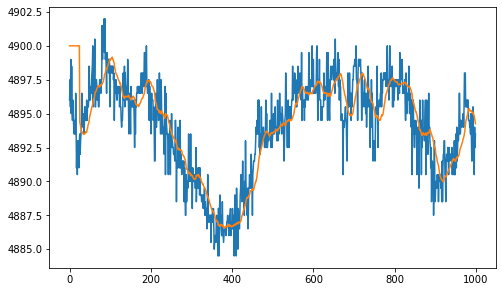

In [759]:
plt.rcParams["figure.figsize"] = (8, 4.8)

plt.plot(bnn['mid_price'])
plt.plot(avgs)
# plt.xlim(0, 100)

(1.127688844422211, 1.4884695013069458)

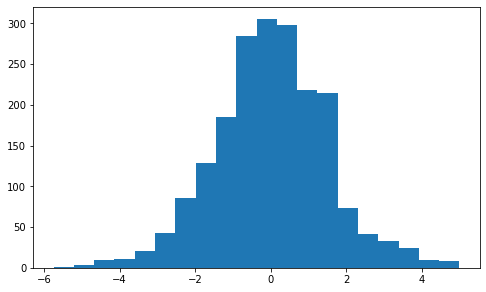

In [411]:
plt.hist(avgs-bnn['mid_price'], bins=20)
(np.mean(np.abs(avgs-bnn['mid_price'])), np.std(avgs-bnn['mid_price']))

In [190]:
mns = []
stds = []
poly = 4
for days in range(2, 100):
    print(days, end='\r')
    timesteps = bnn.index

    avgs = []

    for time in timesteps:
        if time < days:
            avgs.append(4950)
            continue

        ys = bnn['mid_price'][time-days:time]
        x = np.arange(0, days)
        z = np.polyfit(x, ys, poly)

        p = np.poly1d(z)
        acceptable = p(days)
        avgs.append(acceptable)
    mns.append(np.mean(np.abs(avgs-bnn['mid_price'])))
    stds.append(np.std(avgs-bnn['mid_price']))

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

poly 1: 14 days

2: 44

In [191]:
results.append([poly, np.argmin(mns), mns[np.argmin(mns)], np.argmin(stds), stds[np.argmin(stds)]])
results

[[1, 14, 1.0987562499999557, 14, 1.4534963373786995],
 [2, 29, 1.165336040044539, 44, 1.523225741104299],
 [3, 64, 1.2046309731935256, 64, 1.5673341621371413],
 [4, 80, 1.2423236518692424, 72, 1.6113705616451321]]

In [179]:
np.argmin(stds)

64

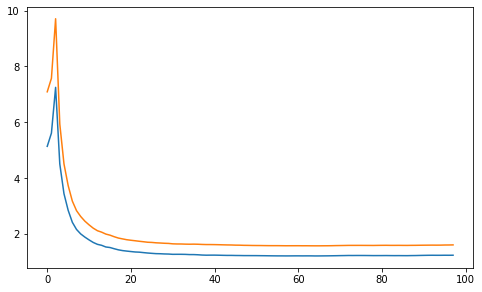

In [180]:
plt.plot(mns)

plt.plot(stds)

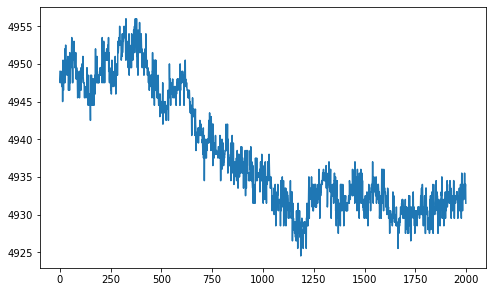

In [370]:
plt.plot(bnn['mid_price'])

In [408]:
hi = []
lo = []

window = 5
for time in bnn.index:
    d = bnn['mid_price'][max(0, time-window):time]
    
    hi.append(np.max(d))
    lo.append(np.min(d))

(0.0, 25.0)

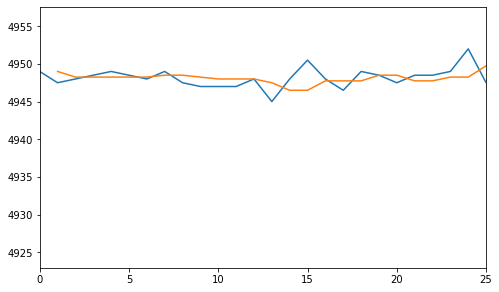

In [424]:
plt.plot(bnn['mid_price'])
# plt.fill_between(bnn.index, lo, hi, color='orange')
plt.plot(np.mean([hi, lo], axis = 0))
plt.xlim(0, 25)

In [410]:
avgs = np.mean([hi, lo], axis = 0)

In [777]:
stds = []
means = []
window = 5
for time in bnn.index:
    low = max(0, time-window)
    if low==0:
        stds.append(0)
        means.append(0)
        continue
    ys = bnn['mid_price'][low:time]
    x = np.arange(0, window)
#     print(x, ys)
    z = np.polyfit(x, ys, 3)
    
    y_hat = np.poly1d(z)(x)
    means.append(np.mean(np.abs(ys - y_hat)))
    stds.append(np.std(y_hat))

In [780]:
hi = []
lo = []
window = 15
for time in bnn.index:
    low = max(0, time-window)
    if low==0:
        hi.append(bnn['mid_price'][low])
        lo.append(bnn['mid_price'][low])
        continue
    a = 1.8
    d = np.mean(bnn['mid_price'][low:time])
    delta = stds[time-1]
#     delta = max(1, delta)
    hi.append(d + delta * a)
    lo.append(d - delta * a)

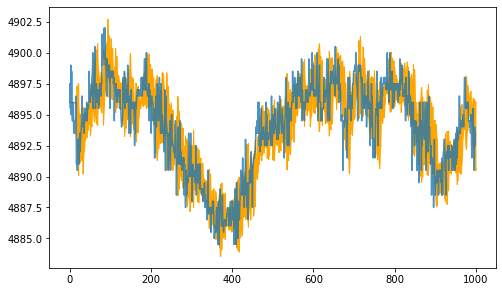

In [781]:
plt.plot(bnn['mid_price'], alpha=0.8)
plt.fill_between(bnn.index, hi, lo, color='orange')
# plt.xlim(0, 1200)

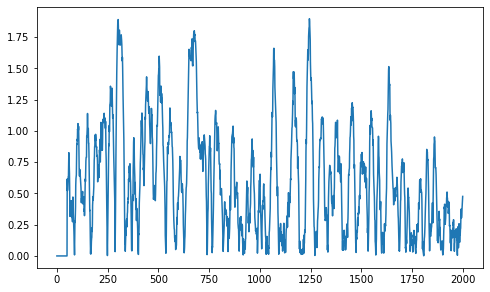

In [719]:
# plt.plot(means)
plt.plot(stds)

In [720]:
np.mean(stds)

0.5897690286883963

In [644]:
data = pd.read_csv('island-data-bottle-round-1/trades_round_1_day_0_nn.csv', delimiter=';')
data

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,NaN,NaN,PEARLS,SEASHELLS,10002.0,1
1,300,NaN,NaN,PEARLS,SEASHELLS,9998.0,2
2,300,NaN,NaN,PEARLS,SEASHELLS,9998.0,1
3,400,NaN,NaN,BANANAS,SEASHELLS,4899.0,9
4,500,NaN,NaN,BANANAS,SEASHELLS,4899.0,1
...,...,...,...,...,...,...,...
5162,998800,NaN,NaN,PEARLS,SEASHELLS,10002.0,1
5163,998800,NaN,NaN,BANANAS,SEASHELLS,4870.0,1
5164,999300,NaN,NaN,BANANAS,SEASHELLS,4875.0,17
5165,999500,NaN,NaN,BANANAS,SEASHELLS,4869.0,2


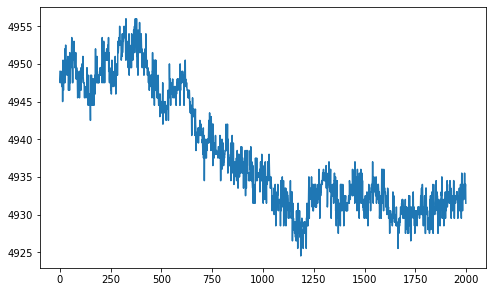

In [683]:
midprice = bnn['mid_price']
plt.plot(midprice)

In [767]:
z = np.polyfit(midprice.index, midprice, 30)
y_hat = np.poly1d(z)(midprice.index)

C:\Users\drobi\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\drobi\Anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\drobi\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:659: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

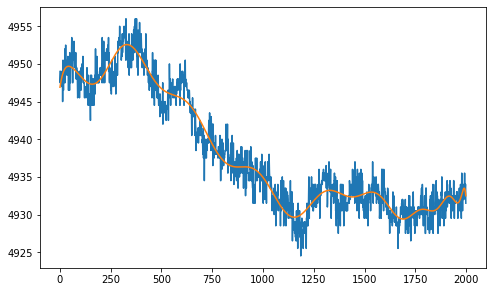

In [766]:
plt.plot(midprice)
plt.plot(y_hat)

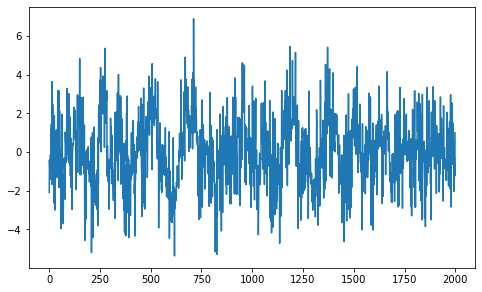

In [768]:
plt.plot(y_hat - midprice)

In [769]:
s = np.std(y_hat - midprice)

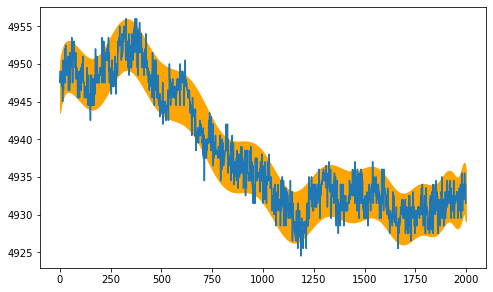

In [770]:
plt.plot(midprice)
plt.fill_between(midprice.index, y_hat + 2*s, y_hat - 2*s, color='orange')

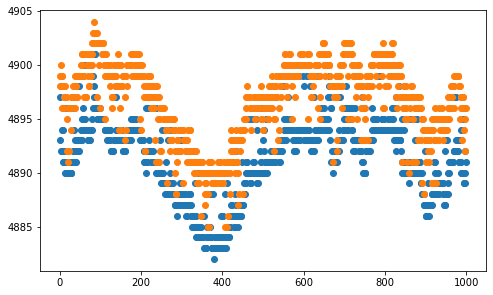

In [785]:
plt.scatter(bnn.index, bnn['bid_price_1'])
plt.scatter(bnn.index, bnn['ask_price_1'])